# The Movie Director's Office

## Introduction to the tool

We will create new classes for the Movie Director's Office. Each class encapsulates the functions that could be assigned to different employees in the office. The classes are:

- `MDO_Researcher`: Core member of the Movie Director Office, the researcher will try to collect and clean the data. The data will be used by the other members for exploration, visualization, and prediction.

- `MDO_Statistician`: First employee of the Movie Director Office, the statistician is in charge of the data exploration. He can provide summary statistics, correlation analysis and ANOVA tests.

- `MDO_Agent`: Second employee of the Movie Director Office, the agent knows his way around the movie industry. He can provide insights into directors, actors and their relationships.

- `MDO_Forecaster`: Third employee of the Movie Director Office, the forecaster is in charge of predicting the success of a movie. He can train and compare different models to predict the box office revenue of a movie.

In [6]:
from mdo import *

In [22]:
pd.read_csv('mdo/data/enriched_data.csv').sort_values(by="profit", ascending=True).head(1)

,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,country,content_rating,budget,actor_2_facebook_likes,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes,genre_Drama,genre_Comedy,genre_Romance,genre_Thriller,genre_Crime,genre_Action,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Other,profit,pop_est,gdp_md,actor_1_degree,actor_1_closeness,actor_1_betweenness,actor_2_degree,actor_2_closeness,actor_2_betweenness,actor_3_degree,actor_3_closeness,actor_3_betweenness,year
582,Claude Chabrol,101.0,324.0,28.0,François Cluzet,678.0,"['Comedy', 'Crime', 'Thriller']",Isabelle Huppert,The Swindle,1256,Michel Serrault,French,France,NaN,60000000,541.0,34.0,231417,1649,21.0,6.6,33,0,1,0,1,1,0,0,0,0,0,0,-59768583,67059887.0,2715518.0,4.0,0.053716,0.001819,4.0,0.048699,0.000911,2.0,0.048691,0.0,1955.0


### Researcher Demo

In [7]:
ben = MDO_Researcher.from_directory("mdo/data")
ben.prepare_data(verbose=True)
ben.split_genres(top=10)
ben.enrich_all(
    save=False, path="data/enriched_data.csv",
    country_par={"replace":True}, actors_par={"replace":True}, release_par={"replace":True})
display(ben.full.head())

ben.research_release_years(workers=2)

Pre-release: 2102 rows with 2102 unique movies
After-release: 1987 rows with 1987 unique movies

Full dataset: 1046 unique movies.


,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,country,content_rating,budget,actor_2_facebook_likes,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes,genre_Drama,genre_Comedy,genre_Romance,genre_Thriller,genre_Crime,genre_Action,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Other,profit,pop_est,gdp_md,actor_1_degree,actor_1_closeness,actor_1_betweenness,actor_2_degree,actor_2_closeness,actor_2_betweenness,actor_3_degree,actor_3_closeness,actor_3_betweenness,year
0,David Mamet,110.0,342.0,393.0,Felicity Huffman,623.0,"[Drama, Mystery, Thriller]",Ben Gazzara,The Spanish Prisoner,1722,Campbell Scott,English,USA,PG,10000000,508.0,97.0,10200000,18697,263.0,7.3,578,1,0,0,1,0,0,0,0,0,0,1,200000,328239523.0,21433226.0,6.0,0.076890,0.004953,6.0,0.083578,0.011591,6.0,0.073669,0.001820,1997.0
1,Jacques Perrin,104.0,63.0,7.0,Jacques Perrin,67.0,"[Documentary, Drama]",Pedro Armendáriz Jr.,Oceans,152,Rie Miyazawa,French,France,G,40000000,63.0,113.0,19406406,7630,42.0,7.8,0,1,0,0,0,0,0,0,0,0,0,1,-20593594,67059887.0,2715518.0,4.0,0.001978,0.000003,2.0,0.001319,0.000000,2.0,0.001319,0.000000,2004.0
2,Renny Harlin,125.0,212.0,394.0,Alan Ford,613.0,"[Horror, Mystery, Thriller]",James D'Arcy,Exorcist: The Beginning,1970,Izabella Scorupco,English,USA,R,50000000,422.0,167.0,41814863,28635,308.0,5.1,893,0,0,0,1,0,0,0,1,0,0,1,-8185137,328239523.0,21433226.0,2.0,0.000879,0.000000,2.0,0.000879,0.000000,2.0,0.000879,0.000000,2004.0
3,Jerry Zucker,134.0,109.0,249.0,Ben Cross,919.0,"[Action, Adventure, Romance, Thriller]",Julia Ormond,First Knight,1695,John Gielgud,English,USA,PG-13,55000000,303.0,53.0,37600435,55350,180.0,5.9,0,0,0,1,1,0,1,1,0,0,0,0,-17399565,328239523.0,21433226.0,4.0,0.077327,0.005738,3.0,0.069717,0.000575,7.0,0.071350,0.006479,1995.0
4,Kenny Ortega,111.0,197.0,6.0,Mekia Cox,433.0,"[Documentary, Music]",Misha Gabriel Hamilton,This Is It,679,Judith Hill,English,USA,PG,60000000,208.0,136.0,71844424,33158,223.0,7.3,0,0,0,0,0,0,0,0,0,0,0,1,11844424,328239523.0,21433226.0,2.0,0.000879,0.000000,2.0,0.000879,0.000000,2.0,0.000879,0.000000,2009.0


,movie_title,release_year
0,The Spanish Prisoner,1997
1,Oceans,2004
2,Kangaroo Jack,2003
3,Exorcist: The Beginning,2004
4,Jingle All the Way,1996
5,First Knight,1995
6,Up Close & Personal,1996
7,This Is It,2009
8,The Tuxedo,2002
9,Under Siege 2: Dark Territory,1995


### Statistician Demo

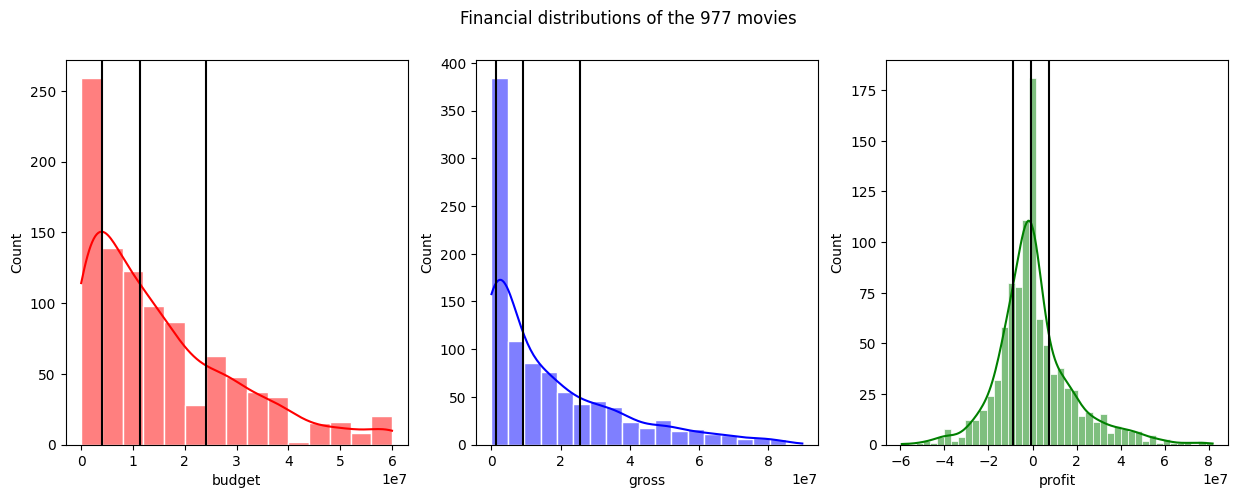

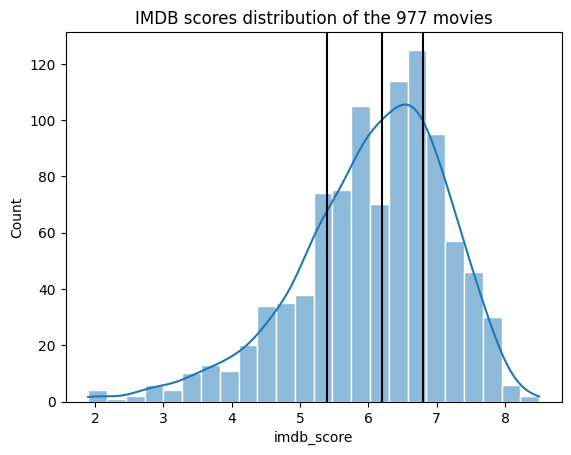

In [8]:
# Initialize the class and prepare the data
steve = MDO_Statistician.from_enriched(
    pre="mdo/data/pre_release.csv", after="mdo/data/after_release.csv",
    path="mdo/data/enriched_data.csv", drop_na=True)
steve.get_dist_financials(plot=True)
steve.get_dist_scores(plot=True)
steve.show_me_the_world()

,correlation_gross,p-value,significant
imdb_score,-0.082643,0.009758,1


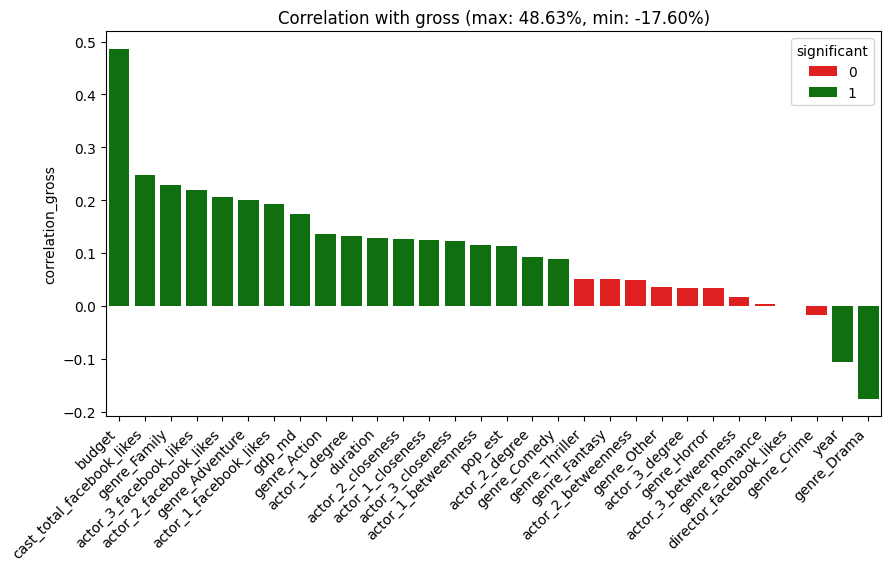

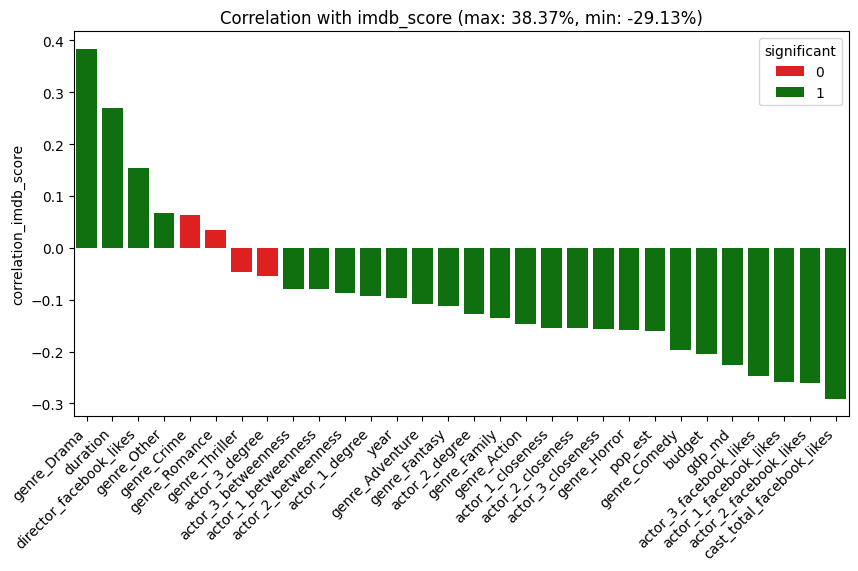

                F-stat imdb_score       p-value
genres                   2.483749  3.003969e-23
content_rating           8.882458  4.505456e-14
director_name            2.294726  1.159519e-11
country                  3.403148  1.194078e-09
language                 4.108765  2.148023e-09
actor_1_name             1.597106  9.456151e-06
actor_2_name             1.164725  1.488879e-01
actor_3_name             1.148430  2.144964e-01
                F-stat gross       p-value
content_rating     11.783379  2.492626e-19
genres              1.655852  2.973736e-08
country             1.686942  1.039435e-02
language            1.674238  2.918379e-02
actor_2_name        1.264529  5.431107e-02
director_name       1.197638  6.211647e-02
actor_1_name        0.987450  5.549966e-01
actor_3_name        0.943763  6.569278e-01


In [9]:
# Are the financial and public success of a movie comming from the same factors?
display(steve.get_correlation("gross", predictors=["imdb_score"], plot=False))
_ = steve.get_correlation("gross", plot=True)
_ = steve.get_correlation("imdb_score", plot=True)

print(steve.get_anova("imdb_score"))
print(steve.get_anova("gross"))

### Agent Demo

In [10]:
josh = MDO_Agent.from_enriched(
    pre="mdo/data/pre_release.csv",
    after="mdo/data/after_release.csv",
    path="mdo/data/enriched_data.csv")

print("Who directed the most movies?")
display(josh.get_top_directors(3, "movie_title"))
print("Who made the most action movies?")
display(josh.get_top_directors(3, "genre_Action"))

Who directed the most movies?


,Average budget,Average gross,Average profit,Average imdb score,Average director facebook likes,Number of movies,Most common language,Most common country,genre_Drama,genre_Comedy,genre_Romance,genre_Thriller,genre_Crime,genre_Action,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Other
director_name,,,,,,,,,,,,,,,,,,,
Spike Lee,6.867857e+06,1.233011e+07,5.462248e+06,6.300,0.0,7,English,USA,5,6,1,0,0,0,0,0,0,0,4
Brian De Palma,1.462500e+07,1.498156e+07,3.565618e+05,6.400,0.0,4,English,USA,2,0,1,4,3,0,0,0,0,0,3
Barry Levinson,1.925000e+07,7.651720e+06,-1.159828e+07,6.275,272.0,4,English,USA,1,3,0,1,0,0,1,0,0,1,1


Who made the most action movies?


,Average budget,Average gross,Average profit,Average imdb score,Average director facebook likes,Number of movies,Most common language,Most common country,genre_Drama,genre_Comedy,genre_Romance,genre_Thriller,genre_Crime,genre_Action,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Other
director_name,,,,,,,,,,,,,,,,,,,
John Glen,2.987500e+07,5.101323e+07,21138228.0,6.550000,46.0,4,English,UK,0,0,0,4,0,4,4,0,0,0,0
Lewis Gilbert,1.916667e+07,5.086667e+07,31700000.0,6.766667,43.0,3,English,UK,0,0,0,3,0,3,3,0,0,0,2
Les Mayfield,2.933333e+07,9.898363e+06,-19434970.0,5.333333,10.0,3,English,USA,0,2,0,0,2,3,0,0,0,0,1


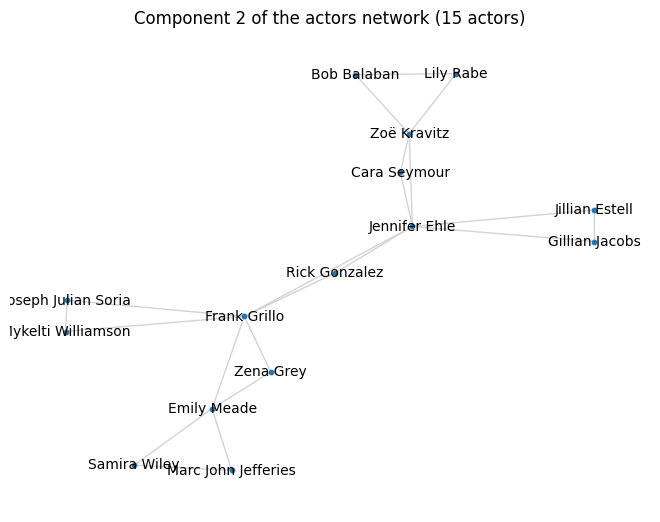

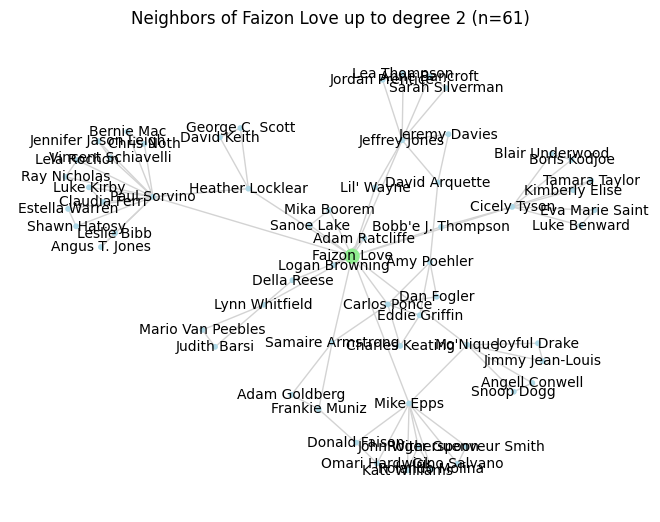

['Adam Goldberg',
 'Adam Ratcliffe',
 'Amy Poehler',
 'Angell Conwell',
 'Angus T. Jones',
 'Anne Bancroft',
 'Bernie Mac',
 'Blair Underwood',
 "Bobb'e J. Thompson",
 'Boris Kodjoe',
 'Carlos Ponce',
 'Charles Keating',
 'Chris Noth',
 'Cicely Tyson',
 'Claudia Ferri',
 'Dan Fogler',
 'David Arquette',
 'David Keith',
 'Della Reese',
 'Donald Faison',
 'Eddie Griffin',
 'Estella Warren',
 'Eva Marie Saint',
 'Frankie Muniz',
 'George C. Scott',
 'Gino Salvano',
 'Heather Locklear',
 'Jeffrey Jones',
 'Jennifer Jason Leigh',
 'Jeremy Davies',
 'Jimmy Jean-Louis',
 'John Witherspoon',
 'Jordan Prentice',
 'Joyful Drake',
 'Judith Barsi',
 'Katt Williams',
 'Kimberly Elise',
 'Lea Thompson',
 'Lela Rochon',
 'Leslie Bibb',
 "Lil' Wayne",
 'Logan Browning',
 'Luke Benward',
 'Luke Kirby',
 'Lynn Whitfield',
 'Mario Van Peebles',
 'Mika Boorem',
 'Mike Epps',
 "Mo'Nique",
 'Omari Hardwick',
 'Paul Sorvino',
 'Ray Nicholas',
 'Roger Guenveur Smith',
 'Rolando Molina',
 'Samaire Armstrong',


In [11]:
most_connected_actor = josh.full.iloc[josh.full["actor_1_degree"].idxmax()]["actor_1_name"]
josh.create_actors_network(load_from="mdo/data/actors.pickle", save_to=None, plot=False)
josh.show_nth_cluster(2)
josh.show_n_neighbors(most_connected_actor, degree=2, plot=True)

In [12]:
josh.get_info_celebrity("Bruce Willis")
# josh.get_info_cebrity("Quentin Tarantino")

Here is all I know about Bruce Willis:
  - name: bruce willis
  - net_worth: 250000000
  - gender: male
  - nationality: us
  - occupation: ['actor', 'film_producer', 'television_producer', 'businessperson', 'voice_actor', 'singer', 'musician', 'writer', 'composer']
  - height: 1.83
  - birthday: 1955-03-19
  - age: 69
  - is_alive: True


{'name': 'bruce willis',
 'net_worth': 250000000,
 'gender': 'male',
 'nationality': 'us',
 'occupation': ['actor',
  'film_producer',
  'television_producer',
  'businessperson',
  'voice_actor',
  'singer',
  'musician',
  'writer',
  'composer'],
 'height': 1.83,
 'birthday': '1955-03-19',
 'age': 69,
 'is_alive': True}

### Forecaster Demo

In [13]:
?MDO_Forecaster.classify_profitable

Signature:
MDO_Forecaster.classify_profitable(
    self,
    model,
    X: pandas.core.frame.DataFrame = None,
    log: bool = True,
    log_path: str = 'profit_classifier.csv',
    log_name: str = 'Classifier',
) -> None
Docstring:
Classify the movies as profitable or not.

Parameters
----------
model : model
    Classifier model
X : pd.DataFrame, optional
    Predictors, by default None
log : bool, optional
    Log the results, by default True
log_path : str, optional
    Path to the log file, by default "profit_classifier.csv"
log_name : str, optional
    Name to register the model in the logs, by default "Classifier"

Returns
-------
pd.DataFrame
    Logs of the model evaluation ordered by F1 score
File:      c:\users\user\desktop\hackathon\mdo\movie_director_office.py
Type:      function

Gross forecast

2024-04-25 21:05: LR significant features
  - mse: 268797824998310.8438
  - mape: 94.4525
  - r2: -0.2486


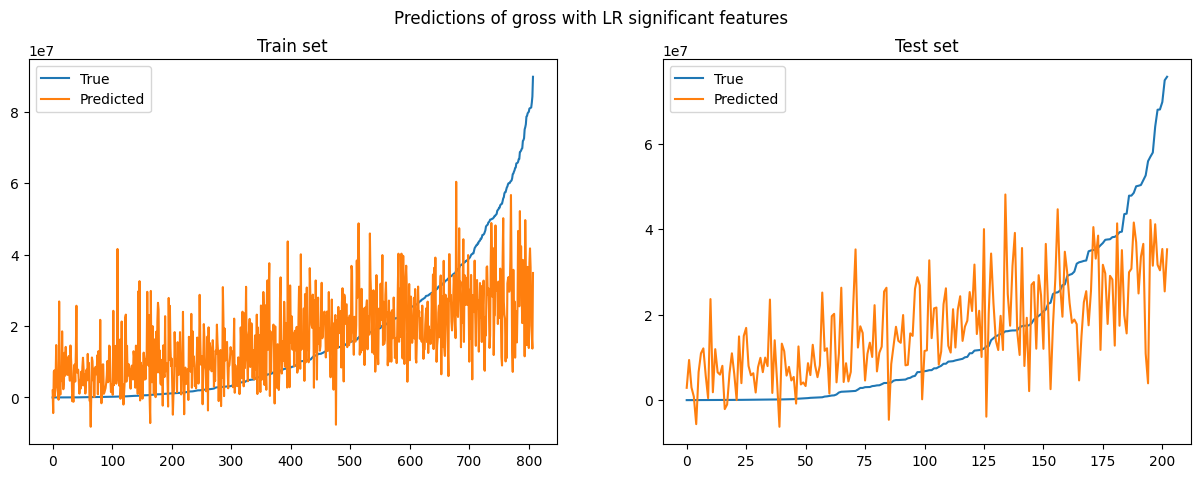

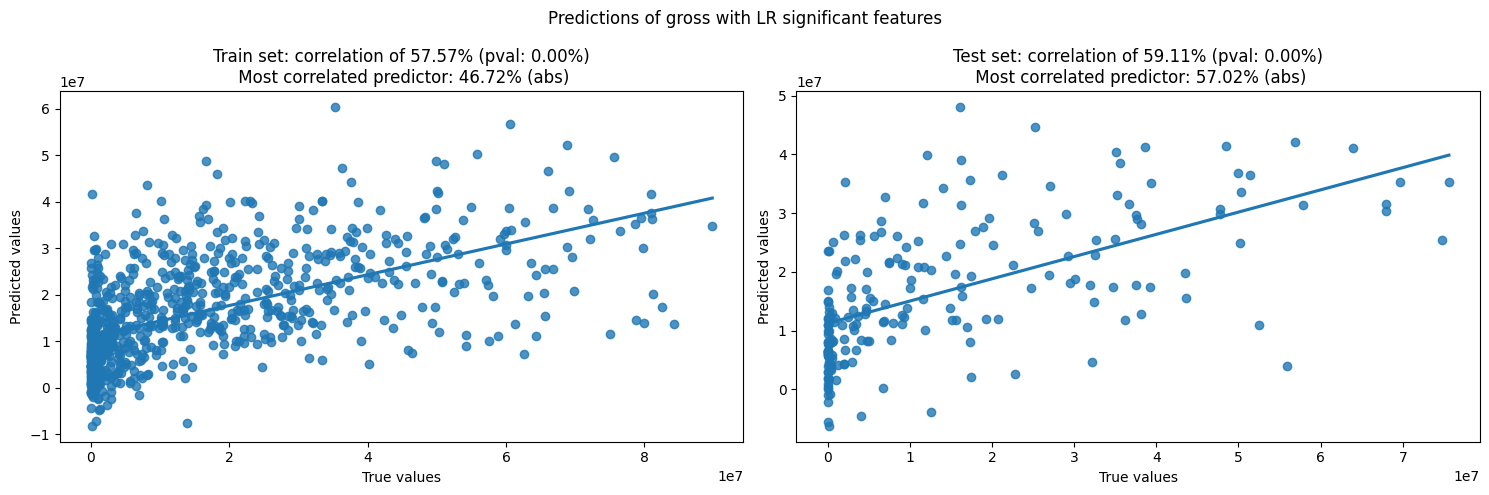

,model,mse,mape,r2,timestamp
0,LR significant features,2.695341e+14,111.266586,-0.244837,2024-04-23 09:00
1,LR budget + cast_fb_likes,2.755604e+14,119.575458,-0.206964,2024-04-23 08:56
2,LR all features,2.821058e+14,114.318023,-0.556587,2024-04-23 08:57
3,LR_budget,2.883176e+14,151.776651,-0.367388,2024-04-23 08:54
4,RF significant features,3.268791e+14,211.188326,-1.413601,2024-04-24 09:32
5,RF all features,3.312395e+14,226.117642,-1.741651,2024-04-24 09:32
6,LR_cast_fb_likes,3.803406e+14,220.990182,-1.359902,2024-04-23 08:56
7,KN significant features,3.818521e+14,117.367751,-0.992415,2024-04-24 09:35
8,KN budget and fb likes,3.834477e+14,138.957906,-0.726172,2024-04-24 09:34
9,KN all features,3.838388e+14,117.374464,-0.998252,2024-04-24 09:35


In [14]:
# Create a forecaster and prepare the data
tom = MDO_Forecaster.from_enriched(
    pre="mdo/data/pre_release.csv",
    after="mdo/data/after_release.csv",
    path="mdo/data/enriched_data.csv",
    drop_na=False)

# Ask Steve for the significant predictors
steve = MDO_Statistician.from_enriched(
    pre="mdo/data/pre_release.csv",
    after="mdo/data/after_release.csv",
    path="mdo/data/enriched_data.csv",
    drop_na=True)
gross_corr = steve.get_correlation("gross", plot=False)
gross_corr = gross_corr[gross_corr["significant"] == 1].index.tolist()

# Ask Tom to evaluate the models
tom.prepare_X_y(target="gross", subset=gross_corr, verbose=False)
tom.evaluate_single_model(
    LinearRegression(), cv=5, logs="exploration/simple_model_logs.csv", rank="mse", name_log="LR significant features",
    plot_pred=True, scatter_plot=True, verbose=True)


Gross forecast many models

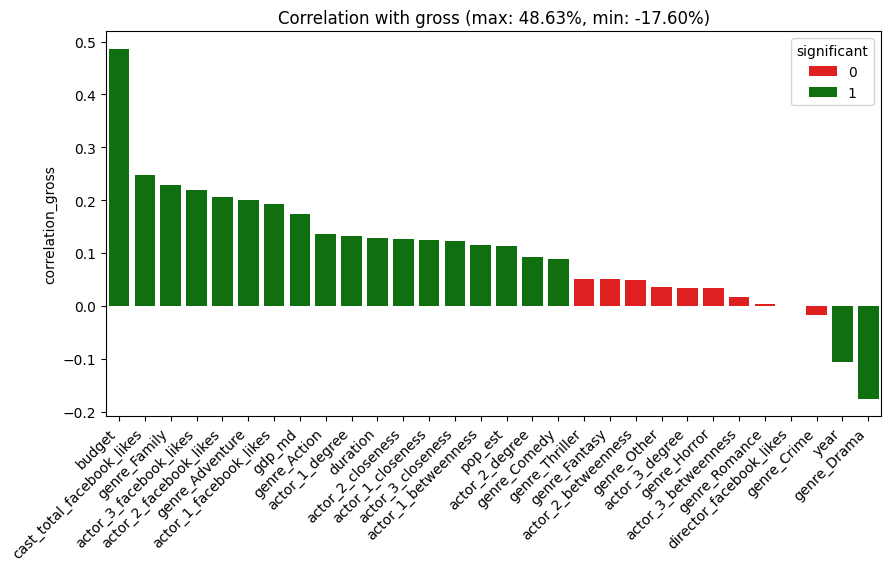

20 initial predictors
20 predictors after encoding
1046 rows before filtering missing values
1011 rows after filtering missing values
Evaluating DummyRegressor
Evaluating LinearRegression
Evaluating Lasso
Evaluating KNeighborsRegressor
Evaluating SVR
Evaluating RandomForestRegressor
Evaluating XGBRegressor
Evaluating MLPRegressor


,model,mse,mape,r2,timestamp
0,enriched_sign_scaled_LinearRegression,2.695341e+14,1.112666e+02,-2.448366e-01,2024-04-23 09:03
1,enriched_sign_scaled_Lasso,2.695341e+14,1.112668e+02,-2.448370e-01,2024-04-23 09:03
2,Lasso,2.752081e+14,1.090124e+02,-3.832356e-01,2024-04-23 09:02
3,scaled_Lasso,2.752938e+14,1.090550e+02,-3.852675e-01,2024-04-23 09:03
4,LinearRegression,2.753864e+14,1.066740e+02,-3.943686e-01,2024-04-23 09:02
5,enriched_Lasso,2.809854e+14,1.140435e+02,-5.144568e-01,2024-04-23 09:03
6,enriched_scaled_Lasso,2.810412e+14,1.140543e+02,-5.157991e-01,2024-04-23 09:03
7,enriched_LinearRegression,2.821058e+14,1.143180e+02,-5.565870e-01,2024-04-23 09:03
8,enriched_MLPRegressor,2.961877e+14,1.032273e+02,-2.783284e-01,2024-04-23 09:03
9,RandomForestRegressor,3.033631e+14,1.748263e+02,-8.851631e-01,2024-04-23 09:02


In [15]:
# Specify what you want Tom to predict and how (features and scaling)
target = "gross"
only_significant = True
enriched = True
standard_scaling = True

pref = f"{"enriched_" if enriched else ""}{'sign_' if only_significant else ""}{'scaled_' if standard_scaling else ""}"

# Create Tom and Steve from the enriched dataset
if enriched:
    tom = MDO_Forecaster.from_enriched(
        pre="mdo/data/pre_release.csv",
        after="mdo/data/after_release.csv",
        path="mdo/data/enriched_data.csv",
        drop_na=False)
    steve = MDO_Statistician.from_enriched(
        pre="mdo/data/pre_release.csv",
        after="mdo/data/after_release.csv",
        path="mdo/data/enriched_data.csv",
        drop_na=True)

# Create Tom and Steve from the original dataset
else:
    tom = MDO_Forecaster.from_directory("mdo/data", drop_na=False)
    tom.split_genres(top=10)
    tom.enrich_all(
        save=False, country=False, actors=False)
    steve = MDO_Statistician.from_directory("mdo/data", drop_na=True)
    steve.split_genres(top=10)
    steve.enrich_all(
        save=False, country=False, actors=False)

# Ask Steve for the significant predictors
if only_significant:
    corr_target = steve.get_correlation(target, plot=True)["significant"]
    significant_predictors = corr_target[corr_target == 1].index.tolist()

# Or use all the predictors
else:
    significant_predictors = []

# Ask Tom to evaluate all the models
tom.prepare_X_y(subset=significant_predictors, target=target)
tom.initiate_models(standard_scaling=standard_scaling)
display(tom.evaluate_standard_models(cv=5, logs=f"exploration/{target}_logs.csv", rank="mse", prefix=pref))

Gross OLS estimation

33 initial predictors
102 predictors after encoding
1046 rows before filtering missing values
1011 rows after filtering missing values
Removing 'language_Icelandic' with p-value 0.99 
   -> R²: 0.39 for 102 predictors
Removing 'genre_Thriller' with p-value 0.99 
   -> R²: 0.39 for 101 predictors
Removing 'country_Iran' with p-value 0.98 
   -> R²: 0.39 for 100 predictors
Removing 'language_Persian' with p-value 0.98 
   -> R²: 0.39 for 99 predictors
Removing 'country_USA' with p-value 0.99 
   -> R²: 0.39 for 98 predictors
Removing 'gdp_md' with p-value 1.00 
   -> R²: 0.39 for 97 predictors
Removing 'actor_3_facebook_likes' with p-value 0.96 
   -> R²: 0.39 for 96 predictors
Removing 'actor_1_facebook_likes' with p-value 0.94 
   -> R²: 0.39 for 95 predictors
Removing 'country_Sweden' with p-value 0.98 
   -> R²: 0.39 for 94 predictors
Removing 'language_Cantonese' with p-value 0.94 
   -> R²: 0.39 for 93 predictors
Removing 'country_Taiwan' with p-value 0.94 
   -> R²: 0.39 for 92 pr

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],LB/Coef,UB/Coef,Relative Range,R2 impact
Feature,,,,,,,,,,
budget,7.499267e+06,550398.900741,13.625149,6.870216e-39,6.419193e+06,8.579342e+06,0.855976,1.144024,0.288048,0.120631
year,-2.421349e+06,508935.030872,-4.757677,2.247534e-06,-3.420057e+06,-1.422641e+06,1.412459,0.587541,-0.824919,0.014167
cast_total_facebook_likes,2.180991e+06,536059.389136,4.068563,5.104430e-05,1.129056e+06,3.232927e+06,0.517680,1.482320,0.964640,0.009943
duration,2.165514e+06,560332.469691,3.864694,1.184284e-04,1.065946e+06,3.265081e+06,0.492237,1.507763,1.015526,0.009618
genre_Horror,1.776726e+06,528303.041776,3.363080,8.001292e-04,7.400108e+05,2.813440e+06,0.416503,1.583497,1.166995,0.006857
genre_Drama,-1.750613e+06,558394.381438,-3.135083,1.768369e-03,-2.846377e+06,-6.548485e+05,1.625932,0.374068,-1.251864,0.005406
genre_Family,2.143765e+06,723925.868544,2.961305,3.136062e-03,7.231703e+05,3.564360e+06,0.337337,1.662663,1.325327,0.005142
content_rating_PG,1.924640e+06,670286.705068,2.871368,4.173597e-03,6.093038e+05,3.239976e+06,0.316581,1.683419,1.366839,0.004316
language_English,1.607114e+06,572581.123705,2.806788,5.101427e-03,4.835098e+05,2.730717e+06,0.300856,1.699144,1.398288,0.004445


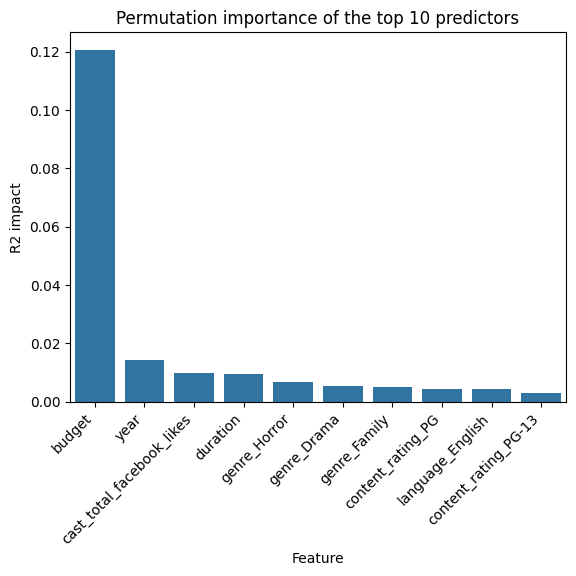

Model 'OLS_sc_enriched_be_0.05' saved in the logs


,name,global_r2,n_coefficients,timestamp
0,OLS_enriched,0.385469,103,2024-04-24 22:23
1,OLS_enriched_be_0.1,0.359587,18,2024-04-24 22:24
2,OLS_enriched_be_0.05,0.352116,14,2024-04-24 22:25
3,OLS_sc_enriched_be_0.05,0.351178,15,2024-04-25 11:00
4,OLS_enriched_be_0.01,0.340301,10,2024-04-24 22:26


In [16]:
tom = MDO_Forecaster.from_enriched(
    pre="mdo/data/pre_release.csv", after="mdo/data/after_release.csv",
    path="mdo/data/enriched_data.csv", drop_na=False)

tom.prepare_X_y(target="gross", verbose=True)

# Try scaling to see if we achieve better results
col_names = tom.X.columns
scaler = StandardScaler()
tom.X = pd.DataFrame(scaler.fit_transform(tom.X), columns=col_names, index=tom.X.index)

results = tom.get_OLS_significance(
    log_name="OLS_sc_enriched_be_0.05", verbose=True, log_path="exploration/OLS_logs.csv",
    backward_elimination=True, alpha=0.05, explainable=True)

Gross vs. Profit and ROI

In [17]:
steve = MDO_Statistician.from_enriched(
    pre="mdo/data/pre_release.csv", after="mdo/data/after_release.csv",
    path="mdo/data/enriched_data.csv", drop_na=True)

steve.full["ROI"] = (steve.full["profit"] / steve.full["budget"])-1

display(steve.get_correlation("gross", predictors=["budget"], plot=False))
display(steve.get_correlation("profit", predictors=["budget"], plot=False))
display(steve.get_correlation("ROI", predictors=["budget"], plot=False))

,correlation_gross,p-value,significant
budget,0.486305,3.894367e-59,1


,correlation_profit,p-value,significant
budget,-0.286168,7.187212e-20,1


,correlation_ROI,p-value,significant
budget,-0.060895,0.057077,0


In [18]:
tom.full["ROI"] = (tom.full["profit"] / tom.full["budget"]) - 1

33 initial predictors
102 predictors after encoding
1046 rows before filtering missing values
1011 rows after filtering missing values


Removing 'content_rating_Passed' with p-value 1.00 
   -> R²: 0.07 for 102 predictors
Removing 'country_Japan' with p-value 1.00 
   -> R²: 0.07 for 101 predictors
Removing 'language_German' with p-value 0.99 
   -> R²: 0.07 for 100 predictors
Removing 'language_Kazakh' with p-value 0.99 
   -> R²: 0.07 for 99 predictors
Removing 'country_South Korea' with p-value 0.99 
   -> R²: 0.07 for 98 predictors
Removing 'country_Romania' with p-value 1.00 
   -> R²: 0.07 for 97 predictors
Removing 'country_USA' with p-value 1.00 
   -> R²: 0.07 for 96 predictors
Removing 'country_Brazil' with p-value 1.00 
   -> R²: 0.07 for 95 predictors
Removing 'language_Portuguese' with p-value 1.00 
   -> R²: 0.07 for 94 predictors
Removing 'genre_Thriller' with p-value 0.99 
   -> R²: 0.07 for 93 predictors
Removing 'country_Sweden' with p-value 1.00 
   -> R²: 0.07 for 92 predictors
Removing 'country_Hong Kong' with p-value 0.99 
   -> R²: 0.07 for 91 predictors
Removing 'actor_3_facebook_likes' with p-v

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],LB/Coef,UB/Coef,Relative Range,R2 impact
Feature,,,,,,,,,,
content_rating_Unrated,154.774000,20.861187,7.419233,2.497738e-13,113.837671,195.710329,0.735509,1.264491,0.528982,0.051450
actor_1_facebook_likes,-0.019117,0.008752,-2.184169,2.917965e-02,-0.036292,-0.001942,1.898429,0.101571,-1.796857,0.003249
year,0.006934,0.003184,2.177603,2.966688e-02,0.000686,0.013183,0.098862,1.901138,1.802275,-0.000075


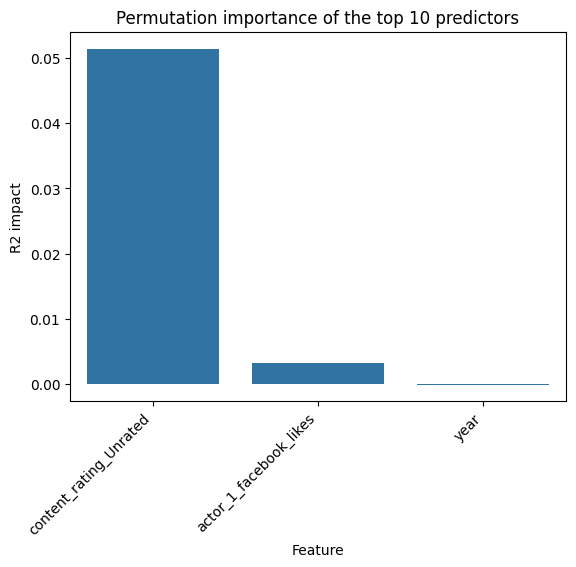

Model 'OLS_enriched_be_0.1' saved in the logs


,name,global_r2,n_coefficients,timestamp
0,OLS_enriched,0.071521,103,2024-04-25 10:46
1,OLS_enriched_be_0.1,0.061182,3,2024-04-25 10:46
2,OLS_enriched_be_0.05,0.061182,3,2024-04-25 10:43


In [19]:
tom.prepare_X_y(target="ROI", verbose=True)
results = tom.get_OLS_significance(
    log_path="exploration/ROI_OLS_logs.csv", log_name="OLS_enriched_be_0.1", verbose=True,
    backward_elimination=True, alpha=0.1, explainable=True)

In [20]:
tom.classify_profitable(
    make_pipeline(StandardScaler(), MLPClassifier()),
    log=True, log_name="Scaled NN - All", log_path="exploration/profit_classifier.csv")

,name,accuracy,precision,recall,f1,timestamp
0,Scaled NN 1000 max_iter - All,0.733883,0.536577,0.441241,0.418150,2024-04-25 10:51
1,Scaled NN 400 max_iter - All,0.730903,0.551626,0.424490,0.404682,2024-04-25 10:51
2,Scaled NN 5000 max_iter - All,0.711111,0.502135,0.441241,0.396617,2024-04-25 10:52
3,Scaled NN - All,0.729927,0.558774,0.412245,0.380083,2024-04-25 10:50
4,Scaled KNN - All,0.733883,0.449553,0.340646,0.372739,2024-04-25 10:53
5,Scaled LogisticRegression - All,0.723996,0.539350,0.324915,0.307935,2024-04-25 10:47
6,RandomForest - All,0.733907,0.384993,0.237500,0.228902,2024-04-25 10:48
7,LogisticRegression - All,0.696279,0.359936,0.208333,0.145181,2024-04-25 10:48
8,Scaled SVC - All,0.765586,0.542512,0.087500,0.136845,2024-04-25 10:49
9,NN - All,0.763605,0.120000,0.037500,0.057143,2024-04-25 10:50
